In [47]:
#Project1 by Stat Squad

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [48]:
ds = pd.read_csv("polls_us_elections_2016.csv")

In [49]:
ds.columns.size

15

In [50]:
ds.columns

Index(['state', 'startdate', 'enddate', 'pollster', 'grade', 'samplesize',
       'population', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
       'rawpoll_mcmullin', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin'],
      dtype='object')

# Data Dictionary for the 2016 Election Polling Dataset

| Variable             | Description                                                                                                                                       | Data Type       | Possible Values / Notes                                                                                                                                          |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **state**            | The geographical area where the poll was conducted.                                                                                               | String          | `"U.S."` for national polls, state names (e.g., `"Virginia"`, `"Georgia"`) for state-level polls.                                                                |
| **startdate**        | The date when the polling began.                                                                                                                  | Date            | Format: `YYYY-MM-DD` (e.g., `2016-11-03`).                                                                                                                       |
| **enddate**          | The date when the polling ended.                                                                                                                  | Date            | Format: `YYYY-MM-DD` (e.g., `2016-11-06`).                                                                                                                       |
| **pollster**         | The organization or entity that conducted the poll.                                                                                               | String          | Examples: `"ABC News/Washington Post"`, `"Gravis Marketing"`.                                                                                                     |
| **grade**            | A rating assigned to the pollster, reflecting their historical accuracy and methodology quality.                                                  | String          | `"A+"`, `"A"`, `"A-"`, `"B+"`, `"B"`, `"B-"`, `NA` (if not available). Grading often provided by organizations like FiveThirtyEight.                             |
| **samplesize**       | The number of respondents who participated in the poll.                                                                                           | Integer         | Examples: `2220`, `748`.                                                                                                                                         |
| **population**       | The type of respondents surveyed.                                                                                                                 | String          | `"lv"`: Likely voters, `"rv"`: Registered voters. Indicates the voter population targeted by the poll.                                                            |
| **rawpoll_clinton**  | The unadjusted percentage of respondents who indicated support for Hillary Clinton.                                                               | Float (Percent) | Range: 0 to 100 (e.g., `47`, `38.03`).                                                                                                                           |
| **rawpoll_trump**    | The unadjusted percentage of respondents who indicated support for Donald Trump.                                                                  | Float (Percent) | Range: 0 to 100 (e.g., `43`, `35.69`).                                                                                                                           |
| **rawpoll_johnson**  | The unadjusted percentage of respondents who indicated support for Gary Johnson.                                                                  | Float (Percent) | Range: 0 to 100 (e.g., `4`, `5.46`).                                                                                                                             |
| **rawpoll_mcmullin** | The unadjusted percentage of respondents who indicated support for Evan McMullin.                                                                 | Float (Percent) | Range: 0 to 100 or `NA`. `NA` where McMullin was not included in the poll.                                                                                       |
| **adjpoll_clinton**  | The adjusted percentage of support for Hillary Clinton after accounting for factors like pollster bias and sample demographics.                   | Float (Percent) | Range: 0 to 100 (e.g., `45.20163`). Adjustments reflect corrections for potential biases or methodological differences.                                          |
| **adjpoll_trump**    | The adjusted percentage of support for Donald Trump after adjustments.                                                                            | Float (Percent) | Range: 0 to 100 (e.g., `41.7243`).                                                                                                                               |
| **adjpoll_johnson**  | The adjusted percentage of support for Gary Johnson after adjustments.                                                                            | Float (Percent) | Range: 0 to 100 (e.g., `4.626221`).                                                                                                                              |
| **adjpoll_mcmullin** | The adjusted percentage of support for Evan McMullin after adjustments.                                                                           | Float (Percent) | Range: 0 to 100 or `NA`. `NA` where McMullin was not included or adjustments were not applicable.                                                                |

---

### Additional Notes

- **Date Format**: All dates are in the `YYYY-MM-DD` format.
- **Percentage Values**: Percentages are represented as numeric values without the `%` symbol (e.g., `47` represents `47%`).
- **`NA` Values**: `NA` indicates that the data is Not Available or Not Applicable for that entry.
- **Adjustments**: Adjusted poll numbers are calculated to account for known biases, sampling errors, or methodological differences across polls. These adjustments aim to provide a more accurate representation of the candidates' standings.

In [51]:
ds.describe()

,samplesize,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
count,4207.000000,4208.000000,4208.000000,2799.000000,30.000000,4208.000000,4208.000000,2799.000000,30.000000
mean,1148.216068,41.990860,39.828710,7.381740,24.004000,43.323527,42.673635,4.659761,24.508827
std,2630.856265,7.728404,7.877951,2.959626,5.703084,7.092413,6.950989,2.473051,5.235812
min,35.000000,11.040000,4.000000,0.000000,9.000000,17.064950,4.372936,-3.667890,11.028320
25%,447.500000,38.000000,35.000000,5.400000,22.500000,40.212745,38.428733,3.145224,23.108498
50%,772.000000,43.000000,40.000000,7.000000,25.000000,44.152280,42.764640,4.384314,25.135225
75%,1236.500000,46.200000,45.000000,9.000000,27.900000,46.921915,46.290115,5.756161,27.976062
max,84292.000000,88.000000,68.000000,25.000000,31.000000,86.772180,72.433030,20.366840,31.574690


In [52]:
ds

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN
3,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,Virginia,2016-09-16,2016-09-22,Ipsos,A-,452.0,lv,46.54,40.04,NaN,NaN,46.47852,40.48017,NaN,NaN
4204,Wisconsin,2016-08-04,2016-08-07,Marquette University,A,683.0,lv,47.00,34.00,9.00,NaN,48.74781,39.07778,4.705020,NaN
4205,Utah,2016-11-01,2016-11-07,Google Consumer Surveys,B,286.0,lv,21.33,35.05,9.99,NaN,26.65200,40.57738,9.705791,NaN
4206,Oregon,2016-10-21,2016-11-02,Ipsos,A-,446.0,lv,46.46,37.41,NaN,NaN,45.12949,37.10720,NaN,NaN


In [53]:
ds['population'].unique()

array(['lv', 'rv', 'a', 'v'], dtype=object)

In [54]:
ds['pollster'].unique().size

196

In [55]:
ds['state'].unique().size

57

In [56]:
ds['state'].unique()

array(['U.S.', 'New Mexico', 'Virginia', 'Iowa', 'Wisconsin',
       'North Carolina', 'Georgia', 'Florida', 'Oregon', 'Ohio',
       'South Carolina', 'New York', 'Michigan', 'Pennsylvania',
       'Missouri', 'New Hampshire', 'Arizona', 'Nevada', 'Colorado',
       'California', 'Washington', 'Texas', 'Utah', 'Illinois', 'Indiana',
       'Tennessee', 'Connecticut', 'Massachusetts', 'New Jersey',
       'Kansas', 'Kentucky', 'Minnesota', 'Oklahoma', 'Maryland',
       'Alabama', 'Nebraska', 'Louisiana', 'Maine', 'Arkansas', 'Alaska',
       'Vermont', 'Idaho', 'Mississippi', 'West Virginia', 'South Dakota',
       'Montana', 'Hawaii', 'Maine CD-1', 'Maine CD-2', 'Rhode Island',
       'Nebraska CD-3', 'Nebraska CD-1', 'Delaware', 'North Dakota',
       'District of Columbia', 'Nebraska CD-2', 'Wyoming'], dtype=object)

In [57]:
ds_national_polls = ds[ds['state'] == 'U.S.']
ds_national_polls

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN
3,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,U.S.,2015-12-03,2015-12-07,Morning Consult,NaN,2047.0,rv,40.00,45.00,NaN,NaN,41.09036,47.41972,NaN,NaN
4046,U.S.,2015-12-13,2015-12-17,Ipsos,A-,289.0,lv,43.00,33.00,NaN,NaN,41.40265,32.10275,NaN,NaN
4047,U.S.,2015-11-13,2015-11-16,Morning Consult,NaN,2001.0,rv,44.00,43.00,NaN,NaN,45.14983,44.84425,NaN,NaN
4048,U.S.,2016-08-01,2016-08-02,The Times-Picayune/Lucid,NaN,912.0,lv,45.00,35.00,6.00,NaN,47.00753,42.03313,1.146771,NaN


In [58]:
ds_national_polls['startdate'].unique()

array(['2016-11-03', '2016-11-01', '2016-11-02', '2016-11-04',
       '2016-11-05', '2016-10-31', '2016-10-20', '2016-10-17',
       '2016-10-14', '2016-10-21', '2016-10-22', '2016-10-11',
       '2016-10-12', '2016-10-28', '2016-10-18', '2016-10-08',
       '2016-10-04', '2016-10-01', '2016-10-09', '2016-10-05',
       '2016-09-27', '2016-10-29', '2016-09-28', '2016-09-26',
       '2016-09-21', '2016-10-10', '2016-10-30', '2016-09-22',
       '2016-10-15', '2016-10-27', '2016-10-26', '2016-09-15',
       '2016-10-25', '2016-09-11', '2016-10-24', '2016-10-23',
       '2016-10-03', '2016-09-18', '2016-08-15', '2016-08-25',
       '2016-09-16', '2016-09-12', '2016-09-01', '2016-09-17',
       '2016-09-08', '2016-09-19', '2016-09-10', '2016-08-24',
       '2016-10-19', '2016-08-28', '2016-09-09', '2016-08-16',
       '2016-08-12', '2016-10-16', '2016-08-09', '2016-08-31',
       '2016-08-26', '2016-09-05', '2016-10-13', '2016-10-07',
       '2016-08-18', '2016-10-06', '2016-10-02', '2016-

In [59]:
ds_national_polls['population'].unique()

array(['lv', 'rv', 'a', 'v'], dtype=object)

What is the distribution of grades per each pollster?

In [60]:
ds_national_polls.groupby(['pollster', 'grade'], dropna=False).size().reset_index(name='count')

,pollster,grade,count
0,ABC News/Washington Post,A+,24
1,American Research Group,C+,6
2,Angus Reid Global,A-,1
3,CBS News/New York Times,A-,12
4,CNN/Opinion Research Corp.,A-,13
5,CVOTER International,C+,115
6,Centre College,NaN,1
7,Data Targeting,NaN,1
8,Echelon Insights,NaN,2
9,Edison Research,NaN,1


In [61]:
ds_national_polls.pivot_table(index='pollster', columns='grade', aggfunc='size', fill_value=0)

grade,A,A+,A-,B,B+,B-,C,C+,C-
pollster,,,,,,,,,
ABC News/Washington Post,0,24,0,0,0,0,0,0,0
American Research Group,0,0,0,0,0,0,0,6,0
Angus Reid Global,0,0,1,0,0,0,0,0,0
CBS News/New York Times,0,0,12,0,0,0,0,0,0
CNN/Opinion Research Corp.,0,0,13,0,0,0,0,0,0
CVOTER International,0,0,0,0,0,0,0,115,0
Emerson College,0,0,0,2,0,0,0,0,0
Fairleigh Dickinson University (PublicMind),1,0,0,0,0,0,0,0,0
Fox News/Anderson Robbins Research/Shaw & Company Research,19,0,0,0,0,0,0,0,0


Each poller has a grade which reflects its rating, possibly based on the historical accuracy. Let's see how this data is distributed.

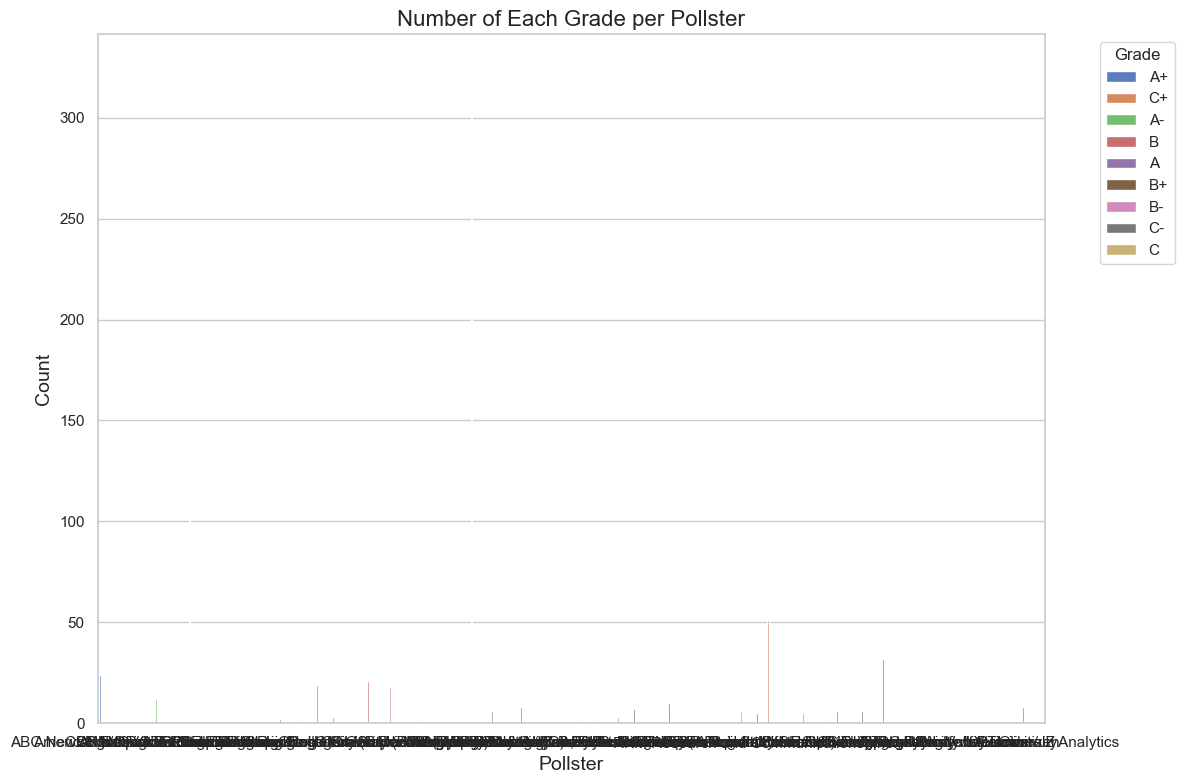

In [62]:
grade_counts = ds_national_polls.groupby(['pollster', 'grade'], dropna=False).size().reset_index(name='count')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.barplot(
    data=grade_counts,
    x='pollster',
    y='count',
    hue='grade',
    palette='muted'
)

plt.title('Number of Each Grade per Pollster', fontsize=16)
plt.xlabel('Pollster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

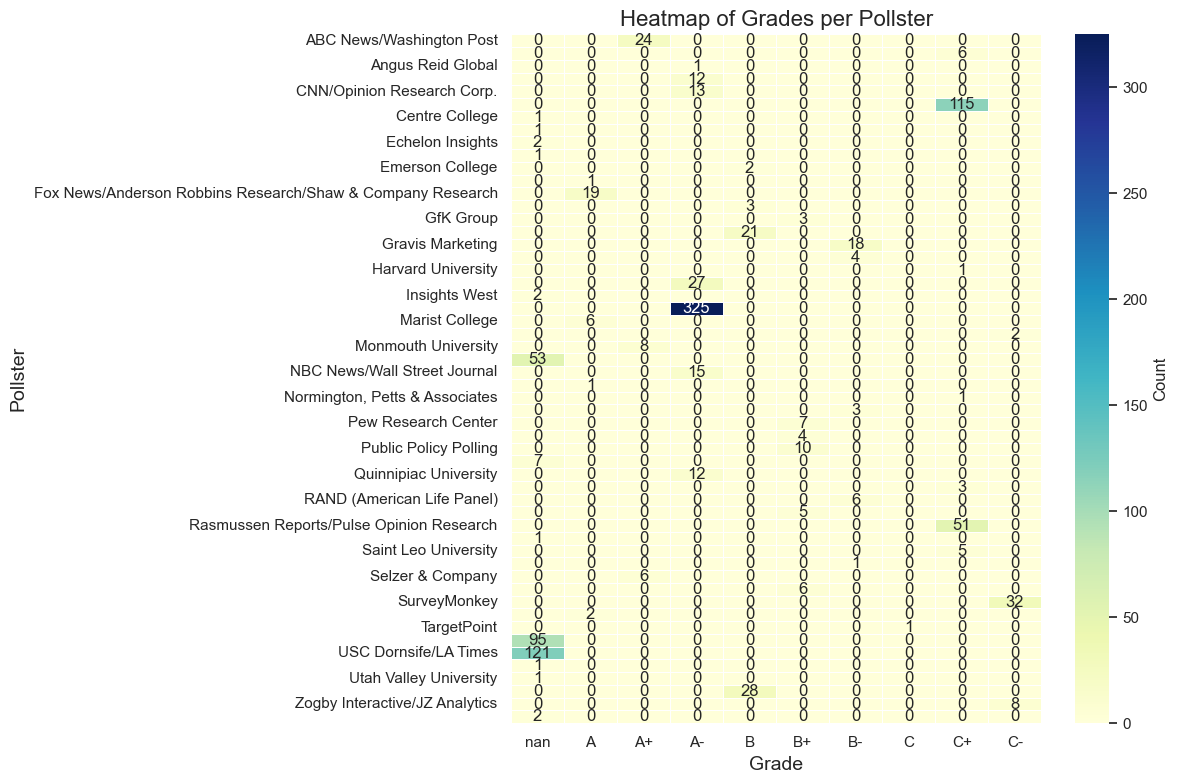

In [63]:
heatmap_data = grade_counts.pivot(index='pollster', columns='grade', values='count')
heatmap_data = heatmap_data.fillna(0)

sns.set(style="white")

plt.figure(figsize=(12, 8))

sns.heatmap(
    heatmap_data,
    annot=True,         # annotate cells with the numeric value
    fmt=".0f",          # format the annotation to integer
    cmap='YlGnBu',      # choose a color palette
    linewidths=.5,
    cbar_kws={"label": "Count"}
)

plt.title('Heatmap of Grades per Pollster', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Pollster', fontsize=14)
plt.tight_layout()
plt.show()

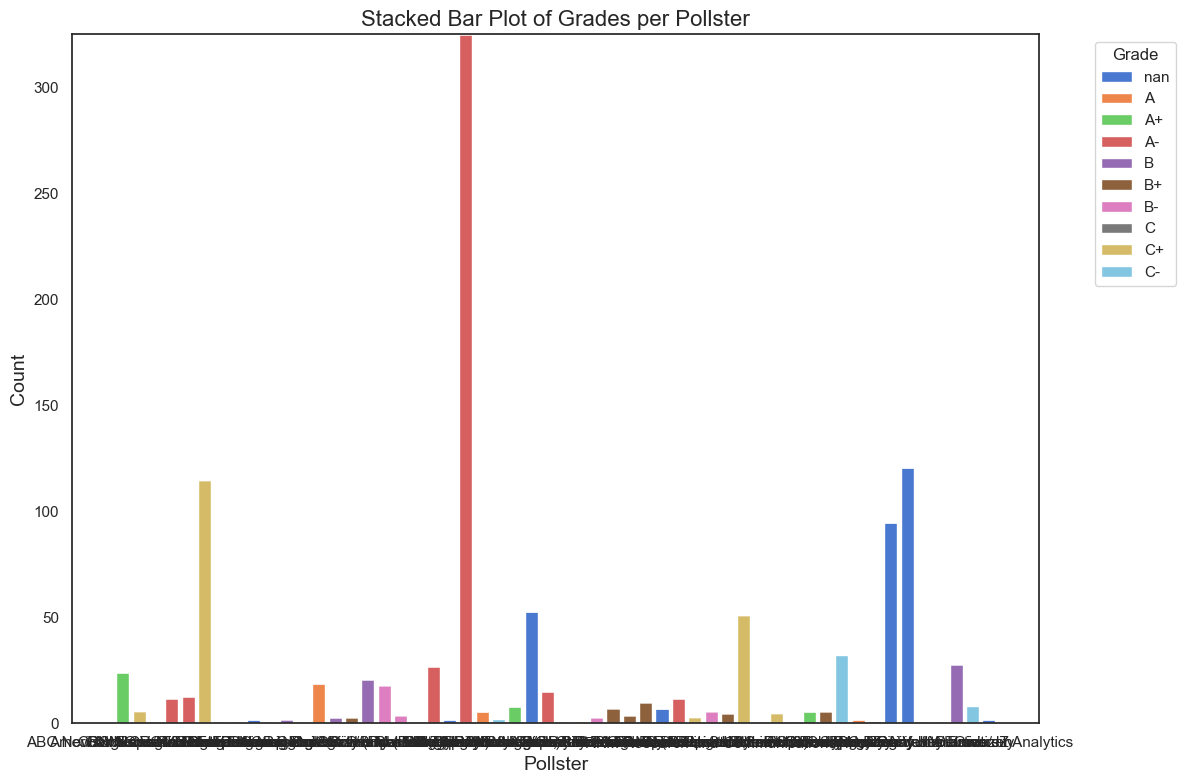

In [64]:
stacked_data = grade_counts.pivot(index='pollster', columns='grade', values='count').fillna(0)
stacked_data = stacked_data.sort_index()
bottom = None

plt.figure(figsize=(12, 8))

palette = sns.color_palette('muted', n_colors=len(stacked_data.columns))

for i, grade in enumerate(stacked_data.columns):
    if i == 0:
        plt.bar(stacked_data.index, stacked_data[grade], label=grade, color=palette[i])
        bottom = stacked_data[grade].values
    else:
        plt.bar(stacked_data.index, stacked_data[grade], bottom=bottom, label=grade, color=palette[i])
        bottom += stacked_data[grade].values


plt.title('Stacked Bar Plot of Grades per Pollster', fontsize=16)
plt.xlabel('Pollster', fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.xticks(rotation=45)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Trump , Clinton and Johnson percentage prediction in 2016 '}, xlabel='State', ylabel='Percentage'>

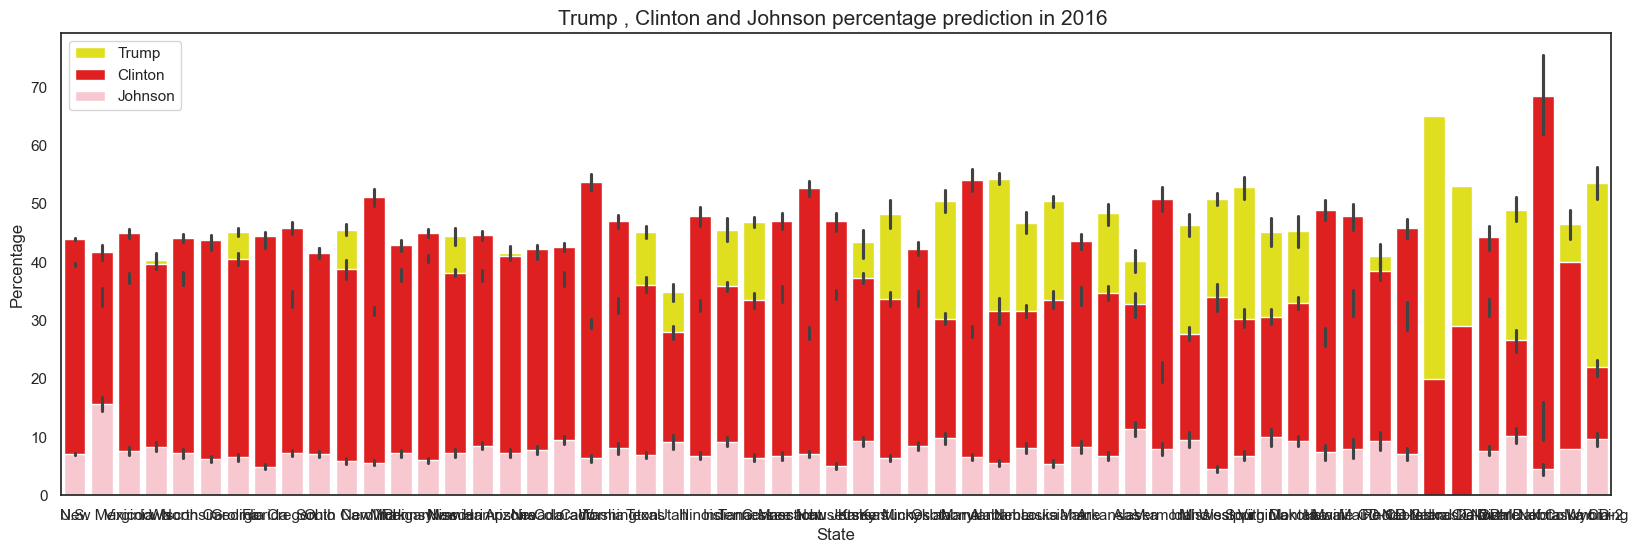

In [88]:
#Fig Size
plt.figure(figsize=(20,6))

plt.xlabel("State")


plt.ylabel("Percentage")

#Title
plt.title("Trump , Clinton and Johnson percentage prediction in 2016 ",size=15)

#plotting data for Trump
sns.barplot(x=ds.state, y=ds.rawpoll_trump,color='yellow', label="Trump",)

#plotting data for Clinton
sns.barplot(x=ds.state, y=ds.rawpoll_clinton, color="red", label="Clinton")

#plotting data for Johnson
sns.barplot(x=ds.state, y=ds.rawpoll_johnson, color="pink", label="Johnson")



